# Analyzing a Time Series of the Thames River in Python


![](https://github.com/JimRaph/JImRaph.github.io/blob/main/Analyzing%20a%20Time%20Series%20of%20the%20Thames%20River%20in%20Python/locations.png?raw=1)

In [14]:
# Package imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1: Read one file to explore the data format and prepare the data for analysis.


- Reading data from '10-11_London_Bridge.txt`

In [15]:
lb = pd.read_csv('Data/10-11_London_Bridge.txt')
lb

,Date and time,water level (m ODN),flag,HW=1 or LW=0
0,01/05/1911 15:40:00,3.7130,1,NaN
1,02/05/1911 11:25:00,-2.9415,0,NaN
2,02/05/1911 16:05:00,3.3828,1,NaN
3,03/05/1911 11:50:00,-2.6367,0,NaN
4,03/05/1911 16:55:00,2.9256,1,NaN
...,...,...,...,...
115498,30/12/1995 20:44:00,3.2900,1,NaN
115499,31/12/1995 02:32:00,-1.6000,0,NaN
115500,31/12/1995 08:59:00,3.2000,1,NaN
115501,31/12/1995 15:03:00,-1.8000,0,NaN


Since one of the column headings in the csv file had a comma (`"flag, HW=1 or LW=0"`), `pd.read_csv` has created an extra, empty column. I need to drop this extra column and rename the column headings. Shorter and more memorable column names will facilitate analysis later on.


In [16]:
lb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115503 entries, 0 to 115502
Data columns (total 4 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Date and time         115503 non-null  object 
 1    water level (m ODN)  115503 non-null  object 
 2    flag                 115503 non-null  int64  
 3    HW=1 or LW=0         0 non-null       float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.5+ MB


In [17]:
df = lb[lb.columns[0:3]]
df.columns = ['datetime','water_level','is_high_tide']

Calling `lb.info()` above shows both the `datetime` and `water_level` columns are of type `object`. I will convert these to `datetime` and `water_level`, respectively. I will also add two columns, `month` and `year`.

In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'], dayfirst=True)
df['water_level'] = df['water_level'].astype(float)

In [25]:
df['month'] = df['datetime'].dt.month
df['year'] = df['datetime'].dt.year

Now there are 5 columns to work with

In [26]:
df.head()

,datetime,water_level,is_high_tide,month,year
0,1911-05-01 15:40:00,3.7130,1,5,1911
1,1911-05-02 11:25:00,-2.9415,0,5,1911
2,1911-05-02 16:05:00,3.3828,1,5,1911
3,1911-05-03 11:50:00,-2.6367,0,5,1911
4,1911-05-03 16:55:00,2.9256,1,5,1911


Before moving on to conduct analysis, I will define a helper function for data cleaning so I don't have to do this each time. The function takes a `DataFrame` (which is read from the `.txt` files), renames the columns, formats the `datetime` column, and converts `water_level` to a `float` data type.

In [27]:
def clean_data(data):

    data = data[data.columns[0:3]]
    data.columns = ['datetime','water_level','is_high_tide']
    data['datetime'] = pd.to_datetime(data['datetime'])
    data['water_level'] = data['water_level'].astype(float)
    data['month'] = data['datetime'].dt.month
    data['year'] = data['datetime'].dt.year

    return data

## 2. Analyze the London Bridge data to get a sense of the water level.

Analyzing the data with a `displot()` or `hist` of `water_level`. This plot shows that the data is bimodal, meaning it has two separate peaks. When the data is plotted with `is_high_tide=0 `and `is_high_tide=1`, separately I get two approximately normal distributions, with separate means and variances. Moving forward, I will analyze low tide and high tide data separately.

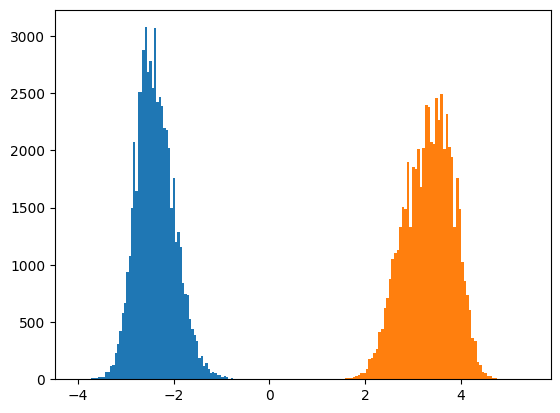

In [28]:
plt.hist(df.query('is_high_tide==0')['water_level'],bins=100)
plt.hist(df.query('is_high_tide==1')['water_level'],bins=100)
plt.show()

Boxplots gives a sense of the min, max, range, and outliers of the data. I will create these separately for high tide and low tide. By default, the whiskers of the boxplot will show 1.5 * the interquartile range.

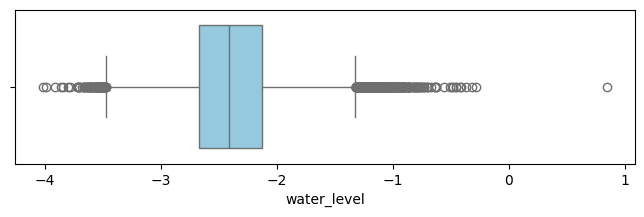

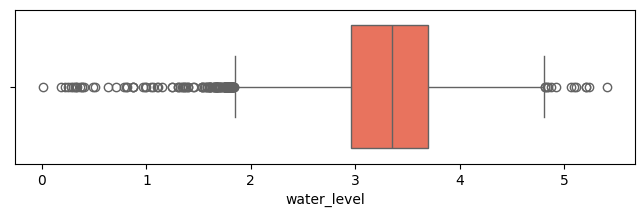

In [29]:
plt.figure(figsize=(8,2))
sns.boxplot(data=df.query('is_high_tide==0'),x='water_level',color='SkyBlue')
plt.show()

plt.figure(figsize=(8,2))
sns.boxplot(data=df.query('is_high_tide==1'),x='water_level',color='Tomato')
plt.show()

I can use the information gathered from the boxplots and summary statistics to count the number of days London Bridge has had high tide over the last 84 years(max year - min year).
- 57917 days

In [30]:
df.query('is_high_tide==1').describe()

,datetime,water_level,is_high_tide,month,year
count,57917,57909.000000,57917.0,57917.000000,57917.000000
mean,1954-03-16 05:09:42.652554496,3.318373,1.0,6.549718,1953.701400
min,1911-05-01 15:40:00,0.010000,1.0,1.000000,1911.000000
25%,1933-02-18 07:02:00,2.956400,1.0,4.000000,1933.000000
50%,1954-04-07 04:10:00,3.352600,1.0,7.000000,1954.000000
75%,1975-05-14 15:48:00,3.700000,1.0,10.000000,1975.000000
max,1995-12-31 21:50:00,5.409900,1.0,12.000000,1995.000000
std,NaN,0.509422,0.0,3.438839,24.334694


Summary statistics

The plot below shows the ratio of high tides on days with water level greater than 3.7 (m ODN), which according to the summary statistics is the 75% percentile (meaning 75% of the data points are below this level - in plain language, this shows very high water level days)

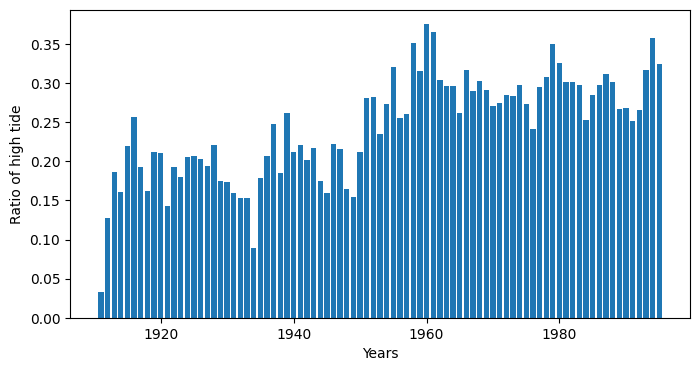

In [31]:
variable = 3.7

plt.figure(figsize=(8,4))
all_days = df.query('is_high_tide==1').groupby('year').count()['is_high_tide']
high_days = df.query(f'(is_high_tide==1) & (water_level>{variable})').groupby('year').count()['is_high_tide']
ratio = (high_days/all_days).reset_index()
plt.bar(ratio.year,ratio.is_high_tide)
plt.xlabel('Years')
plt.ylabel('Ratio of high tide')
plt.show()

In [32]:
df.query('(is_high_tide==0)').describe()

,datetime,water_level,is_high_tide,month,year
count,57586,57580.000000,57586.0,57586.000000,57586.000000
mean,1954-03-05 09:04:47.743896256,-2.383737,0.0,6.548050,1953.671708
min,1911-05-02 11:25:00,-4.013000,0.0,1.000000,1911.000000
25%,1933-01-28 13:24:30,-2.666900,0.0,4.000000,1933.000000
50%,1954-02-21 16:59:00,-2.412900,0.0,7.000000,1954.000000
75%,1975-07-03 11:06:30,-2.128700,0.0,10.000000,1975.000000
max,1995-12-31 15:03:00,0.842900,0.0,12.000000,1995.000000
std,NaN,0.399748,0.0,3.439252,24.366551


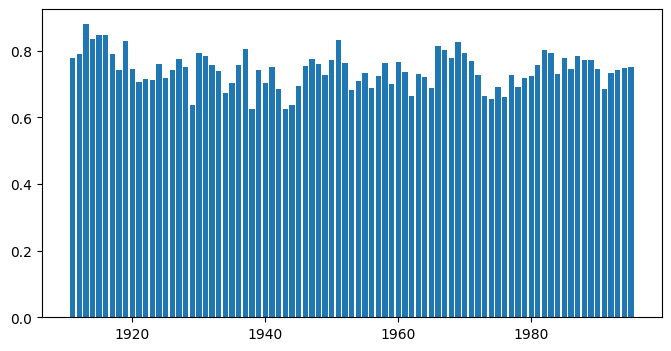

In [35]:
variable = -2.66

plt.figure(figsize=(8,4))
all_days = df.query('is_high_tide==0').groupby('year').count()['is_high_tide']
high_days = df.query(f'(is_high_tide==0) & (water_level>{variable})').groupby('year').count()['is_high_tide']
ratio = (high_days/all_days).reset_index()
plt.bar(ratio.year,ratio.is_high_tide)
plt.show()

## 3. Assess monthly trends in water level for 1927, 1928 and 1929.

In [37]:
water_level = pd.DataFrame()

for year in [1927, 1928, 1929]:
    level_per_year = df.query(f'year=={year}').set_index('datetime')
    level_per_year = level_per_year.groupby('is_high_tide').resample('1ME').median()['water_level'].reset_index()
    level_per_year['month'] = level_per_year.datetime.dt.month
    level_per_year['year'] = level_per_year.datetime.dt.year
    water_level = pd.concat([water_level,level_per_year]).reset_index(drop=True)

In [38]:
water_level

,is_high_tide,datetime,water_level,month,year
0,0,1927-01-31,-2.40810,1,1927
1,0,1927-02-28,-2.38270,2,1927
2,0,1927-03-31,-2.35730,3,1927
3,0,1927-04-30,-2.43350,4,1927
4,0,1927-05-31,-2.54780,5,1927
...,...,...,...,...,...
67,1,1929-08-31,3.15420,8,1929
68,1,1929-09-30,3.28755,9,1929
69,1,1929-10-31,3.31930,10,1929
70,1,1929-11-30,3.39550,11,1929


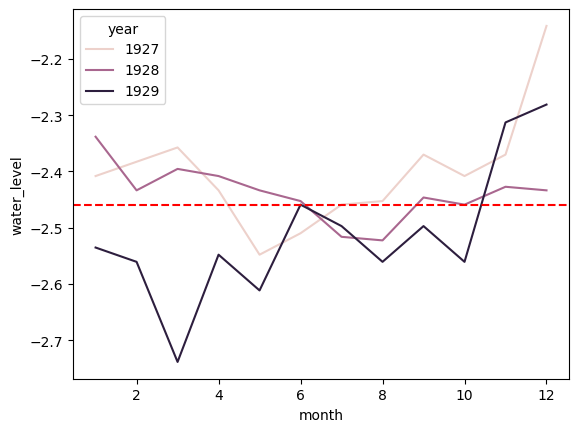

In [39]:
sns.lineplot(data=water_level[water_level['is_high_tide']==0],
            y='water_level',x='month',hue='year')
plt.axhline(-2.46,0,12,linestyle='--',color='red')
plt.show()

## 4. Beginning a forecasting model for London Bridge: a taste of autocorrelation.

<Axes: xlabel='datetime', ylabel='water_level'>

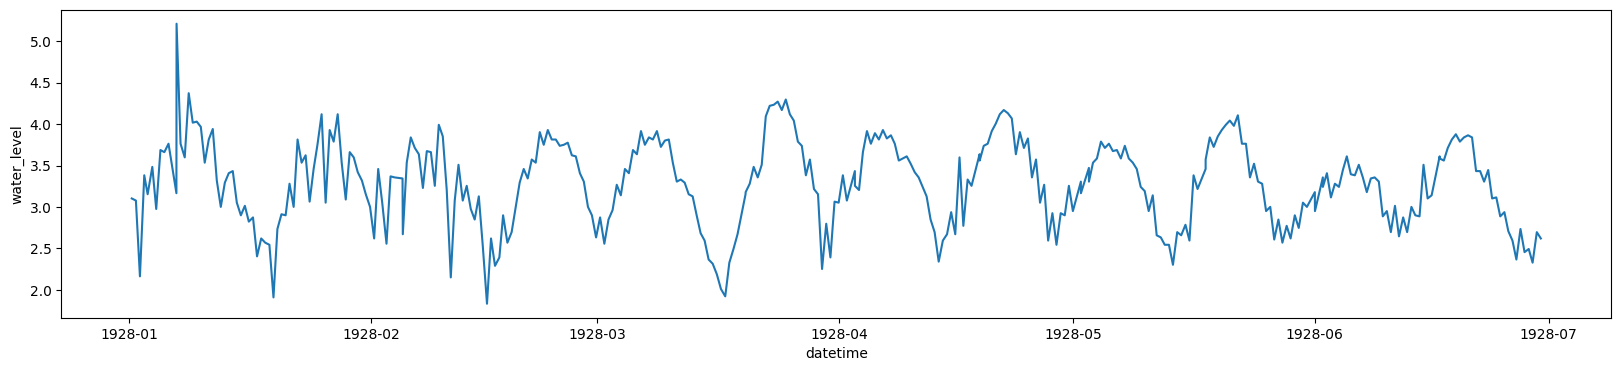

In [40]:
df_c = df.query('(year==1928) & (month<=6)').reset_index()
fig, ax = plt.subplots(figsize=(20,4))
sns.lineplot(data=df_c.query('is_high_tide==1'),x='datetime',y='water_level', ax=ax)

When looking at the **high tide levels** for a sample of the data, it appears to have some monthly peaks and troughs.

I can compute a metric called autocorrelation to quantify this repeating pattern. The autocorrelation is highest at 15 days (interestingly, this matches with the  lunar cycle - waxing and waning of the moon).

In [49]:
def autocorr(data,level='1D',flag=0):
    high_low = {0:'high',1:'low'}
    level_dict = {'1D':'daily','15D':'biweekly','1ME':'monthly','1YE':'annual'}
    data = data[data['is_high_tide']==flag].set_index('datetime').resample(level).mean()['water_level']
    diff = data.diff()
    autocorrelation = diff.autocorr()
    print(f"The autocorrelation of {level_dict[level]} {high_low[flag]} values is %4.2f" %(autocorrelation))

In [50]:
autocorr(df,level='1YE',flag=1)
autocorr(df,level='1YE',flag=0)
autocorr(df,level='1ME',flag=1)
autocorr(df,level='1ME',flag=0)
autocorr(df,level='15D',flag=1)
autocorr(df,level='15D',flag=0)
autocorr(df,level='1D',flag=1)
autocorr(df,level='1D',flag=0)

The autocorrelation of annual low values is -0.19
The autocorrelation of annual high values is -0.23
The autocorrelation of monthly low values is -0.36
The autocorrelation of monthly high values is -0.20
The autocorrelation of biweekly low values is -0.84
The autocorrelation of biweekly high values is -0.74
The autocorrelation of daily low values is 0.12
The autocorrelation of daily high values is -0.06


The biweekly values correspond to 15 days. The negative high values means collaborates with what the lineplot showed earlier - repeating patterns of peaks and troughs

**WELCOME TO THE END**